In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

import os

In [39]:
df = pd.read_csv('Knicks_Season.csv')

In [41]:
df.drop(columns=['Date', 'Rk', 'Gtm', 'H/@', 'score OT', 'Opp', 'score Opp', 'score Tm'], inplace=True)

In [42]:
df['score Rslt'] = df['score Rslt'].map({'W': 1, 'L': 0})

In [43]:
df = df.dropna()

In [44]:
X = df.drop('score Rslt', axis=1)

In [45]:
y = df['score Rslt']

In [46]:
unique_seed = 1973
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=unique_seed)

In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
log_reg = LogisticRegression(random_state = unique_seed, max_iter=200)

In [49]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200, random_state=1973)

In [50]:
y_pred = log_reg.predict(X_test_scaled)

In [51]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.77


In [52]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

Confusion Matrix:
 [[2 2]
 [1 8]]


In [53]:
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      0.50      0.57         4
         1.0       0.80      0.89      0.84         9

    accuracy                           0.77        13
   macro avg       0.73      0.69      0.71        13
weighted avg       0.76      0.77      0.76        13



In [54]:
print(log_reg.coef_)

[[ 0.58911359  0.37677991  0.32510196  0.43077989  0.36960185  0.43534672
   0.19306106  0.01685409  0.26068645  0.42063262  0.36420162  0.17028882
   0.40113128  0.1637238   0.31328844  0.35845485  0.37687779  0.44196115
  -0.14179289 -0.35573034  0.09273552 -0.53579929 -0.10233763 -0.5138742
  -0.45933689  0.05671871 -0.65509749 -0.08228781 -0.12368412 -0.19099981
  -0.57920996 -0.43263133 -0.48712344  0.00328872  0.06769239 -0.58747878
  -0.41210987 -0.21238771 -0.70438813  0.07192793  0.63239788  0.34090898]]


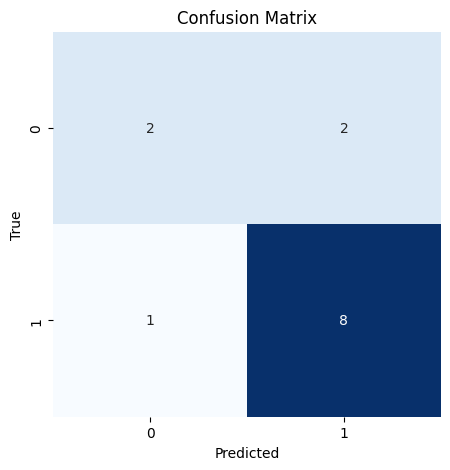

In [55]:
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

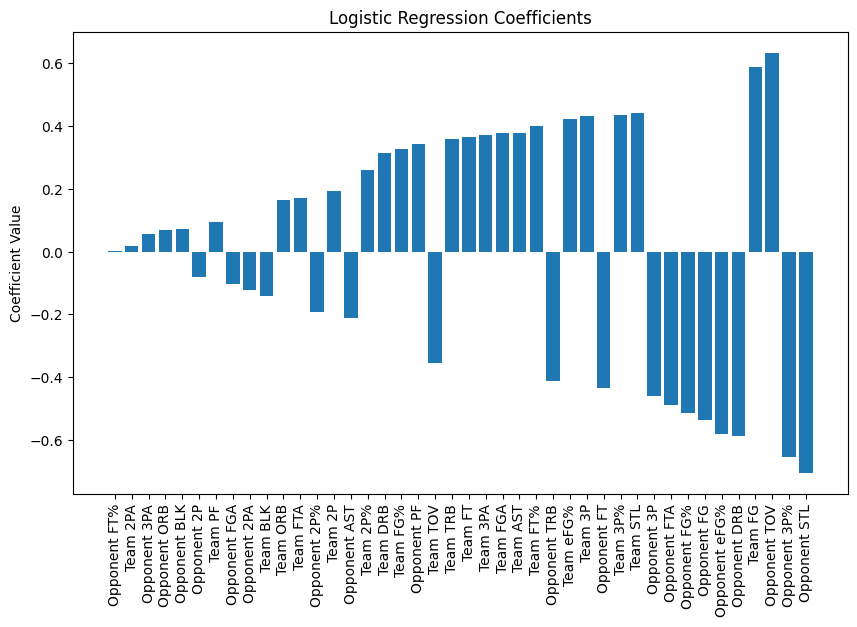

In [56]:
coeffs = log_reg.coef_[0]
feature_names = X.columns

sorted_idx = np.argsort(np.abs(coeffs))

plt.figure(figsize=(10, 6))
plt.bar(feature_names[sorted_idx], coeffs[sorted_idx])
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Coefficients')
plt.xticks(rotation=90)
plt.show()

In [23]:
corr_matrix = df.corr()

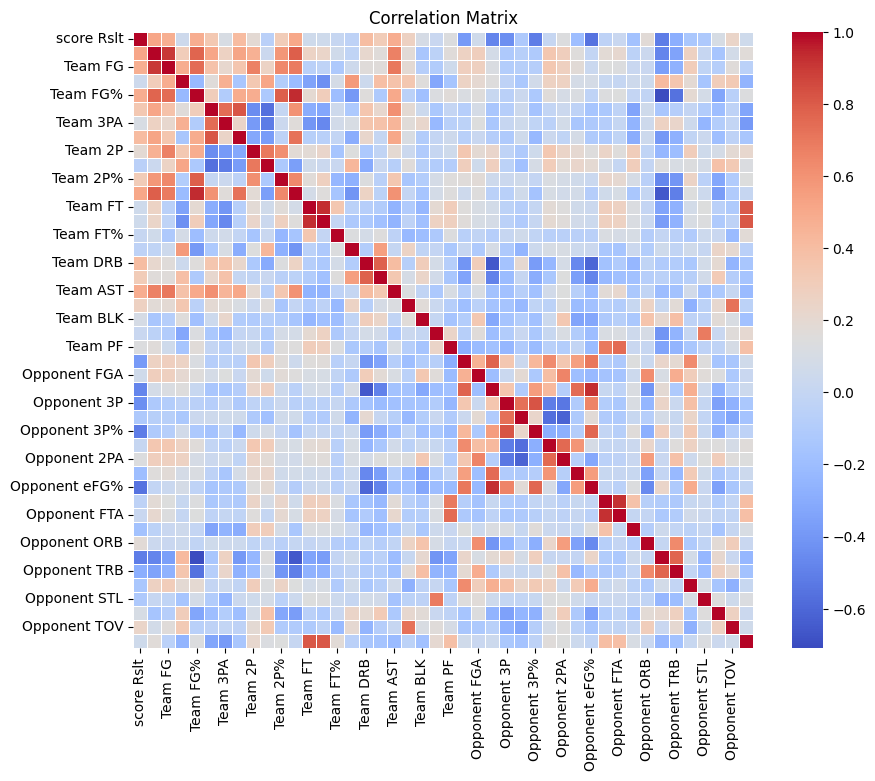

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Correlation Matrix')
plt.show()

In [25]:
target_corr = corr_matrix['score Rslt'].sort_values(ascending=False)

print(target_corr)

score Rslt       1.000000
score Tm         0.518498
Team eFG%        0.511578
Team FG%         0.485736
Team AST         0.483045
Team FG          0.477667
Team 3P%         0.409329
Team DRB         0.400540
Team 3P          0.335270
Team TRB         0.312386
Team 2P%         0.307505
Team STL         0.270684
Opponent TOV     0.233692
Team 2P          0.192208
Opponent ORB     0.175117
Opponent 2PA     0.137607
Team PF          0.133576
Team 3PA         0.109270
Opponent BLK     0.104567
Team BLK         0.096065
Opponent FGA     0.060009
Team FT          0.056954
Opponent PF      0.056953
Team FTA         0.054835
Team FGA         0.051495
Team TOV         0.022700
Opponent FTA     0.021754
Team FT%         0.010390
Opponent 2P      0.005892
Opponent FT     -0.036316
Team ORB        -0.038114
Team 2PA        -0.056245
Opponent 3PA    -0.116655
Opponent STL    -0.117418
Opponent AST    -0.139012
Opponent FT%    -0.171888
Opponent 2P%    -0.195988
Opponent TRB    -0.284121
Opponent FG 